## Gaussian Mixture Model

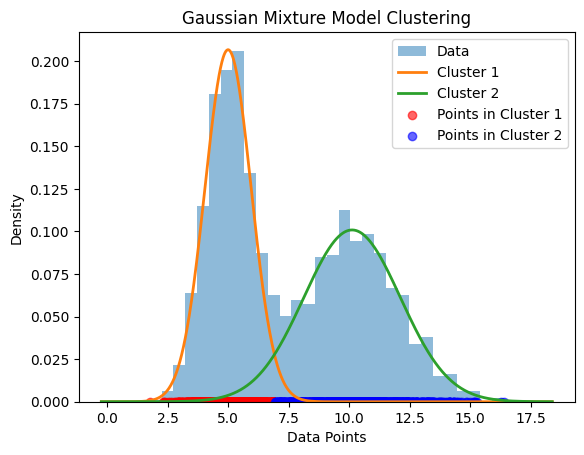

[0.49530388 0.50469612]


In [57]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Generate synthetic data for two clusters
np.random.seed(42)
data1 = np.random.normal(5, 1, 1000)  # Cluster 1: mean=5, std=1
data2 = np.random.normal(10, 2, 1000)  # Cluster 2: mean=15, std=2
data = np.concatenate([data1, data2])

# Initialize parameters
K = 2  # Number of clusters
n = len(data)
weights = np.array([0.5, 0.5])  # Equal weights initially
means = np.random.choice(data, K)  # Random means
variances = np.array([1.0, 1.0])  # Initial variances
responsibilities = np.zeros((n, K))

# EM Algorithm
max_iter = 100
tolerance = 1e-4

for iteration in range(max_iter):
    # E-Step: Calculate responsibilities
    for k in range(K):
        responsibilities[:, k] = weights[k] * norm.pdf(data, means[k], np.sqrt(variances[k]))
    responsibilities = responsibilities / responsibilities.sum(axis=1, keepdims=True)
    
    # M-Step: Update parameters
    new_weights = responsibilities.mean(axis=0)
    new_means = np.sum(responsibilities * data[:, np.newaxis], axis=0) / responsibilities.sum(axis=0)
    new_variances = np.sum(responsibilities * (data[:, np.newaxis] - new_means) ** 2, axis=0) / responsibilities.sum(axis=0)
    
    # Check for convergence
    if (np.abs(new_means - means).max() < tolerance and
        np.abs(new_variances - variances).max() < tolerance and
        np.abs(new_weights - weights).max() < tolerance):
        break
    
    weights, means, variances = new_weights, new_means, new_variances

# Plot results
x = np.linspace(min(data) - 2, max(data) + 2, 1000)

# Plot histogram of the data
plt.hist(data, bins=30, density=True, alpha=0.5, label='Data')

# Plot each Gaussian
for k in range(K):
    plt.plot(x, weights[k] * norm.pdf(x, means[k], np.sqrt(variances[k])), 
             label=f'Cluster {k+1}', lw=2)

# Scatter plot colored by responsibilities
cluster_assignments = responsibilities.argmax(axis=1)  # Hard assignment
colors = ['red', 'blue']
for k in range(K):
    plt.scatter(data[cluster_assignments == k], 
                np.zeros_like(data[cluster_assignments == k]), 
                color=colors[k], alpha=0.6, label=f'Points in Cluster {k+1}')

plt.title("Gaussian Mixture Model Clustering")
plt.xlabel("Data Points")
plt.ylabel("Density")
plt.legend()
plt.show()
print(weights)

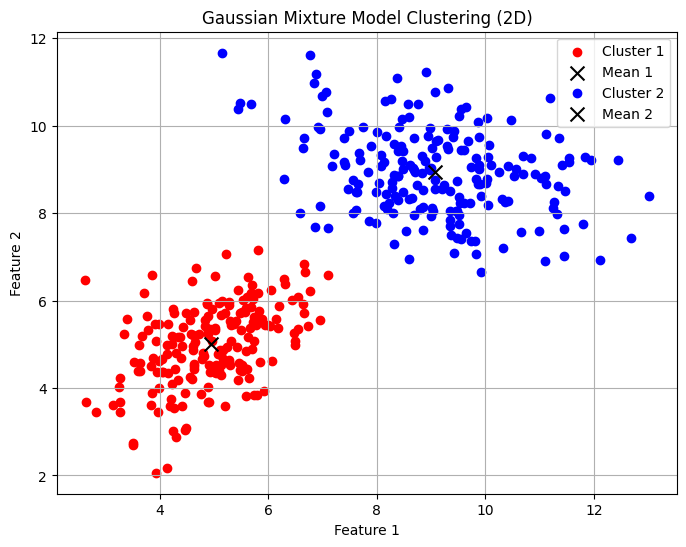

12 [0.49674071 0.50325929]


In [56]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

# Generate synthetic 2D data for two clusters
np.random.seed(42)
data1 = np.random.multivariate_normal([5, 5], [[1, 0.5], [0.5, 1]], 200)  # Cluster 1
data2 = np.random.multivariate_normal([9, 9], [[2, -0.5], [-0.5, 1]], 200)  # Cluster 2
data = np.vstack([data1, data2])  # Combine clusters

# Initialize parameters
K = 2  # Number of clusters
n, d = data.shape
weights = np.array([0.4, 0.6])  # Equal weights initially
means = data[np.random.choice(n, K, replace=False)]  # Randomly choose initial means
covariances = [np.eye(d)] * K  # Initial covariance matrices
responsibilities = np.zeros((n, K))

# EM Algorithm
max_iter = 100
tolerance = 1e-4

for iteration in range(max_iter):
    # E-Step: Calculate responsibilities
    for k in range(K):
        rv = multivariate_normal(mean=means[k], cov=covariances[k])
        responsibilities[:, k] = weights[k] * rv.pdf(data)
    responsibilities = responsibilities / responsibilities.sum(axis=1, keepdims=True)
    
    # M-Step: Update parameters
    new_weights = responsibilities.mean(axis=0)
    new_means = np.sum(responsibilities[:, :, np.newaxis] * data[:, np.newaxis, :], axis=0) / responsibilities.sum(axis=0)[:, np.newaxis]
    new_covariances = []
    for k in range(K):
        diff = data - new_means[k]
        new_cov = np.dot((responsibilities[:, k][:, np.newaxis] * diff).T, diff) / responsibilities[:, k].sum()
        new_covariances.append(new_cov)
    
    # Check for convergence
    if (np.abs(new_means - means).max() < tolerance and
        np.abs(np.array(new_covariances) - np.array(covariances)).max() < tolerance and
        np.abs(new_weights - weights).max() < tolerance):
        break
    
    weights, means, covariances = new_weights, new_means, new_covariances

# Assign clusters
cluster_assignments = responsibilities.argmax(axis=1)

# Plot results
colors = ['red', 'blue']
plt.figure(figsize=(8, 6))
for k in range(K):
    cluster_data = data[cluster_assignments == k]
    plt.scatter(cluster_data[:, 0], cluster_data[:, 1], color=colors[k], label=f'Cluster {k+1}')
    plt.scatter(means[k, 0], means[k, 1], color='black', marker='x', s=100, label=f'Mean {k+1}')

plt.title('Gaussian Mixture Model Clustering (2D)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid()
plt.show()
print(iteration,weights)